**Links**

[Kaggle Dataset](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection?resource=download)

In [35]:
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import numpy as np
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf



In [2]:
annotations_dir = os.path.abspath("data/annotations/")
images_dir = os.path.abspath("data/images/")

# Parse XML Data Annotations

In [43]:
import xmltodict

def insert_annotation_from_object(annotations, object, data_dict):
    ''' Set information from object and data_dict into annotations'''
    filename = data_dict["annotation"]["filename"]
    width = int(data_dict["annotation"]["size"]["width"])
    height = int(data_dict["annotation"]["size"]["height"])
    depth = int(data_dict["annotation"]["size"]["depth"])
    segmented = int(data_dict["annotation"]["segmented"])
    label = object["name"]
    pose = object["pose"]
    truncated = object["truncated"]
    occluded = object["occluded"]
    difficult = object["difficult"]
    xmin = int(object["bndbox"]["xmin"])
    ymin = int(object["bndbox"]["ymin"])
    xmax = int(object["bndbox"]["xmax"])
    ymax = int(object["bndbox"]["ymax"])

    annotations["filename"].append(filename)
    annotations["width"].append(width)
    annotations["height"].append(height)
    annotations["depth"].append(depth)
    annotations["segmented"].append(segmented)
    annotations["label"].append(label)
    annotations["pose"].append(pose)
    annotations["truncated"].append(truncated)
    annotations["occluded"].append(occluded)
    annotations["difficult"].append(difficult)
    annotations["xmin"].append(xmin)
    annotations["ymin"].append(ymin)
    annotations["xmax"].append(xmax)
    annotations["ymax"].append(ymax)


def get_all_annotations_from_xml(annotations_dir):
    annotations = {
        "filename": [],
        "label": [], 
        "pose": [],
        "truncated": [],
        "occluded": [],
        "difficult": [],
        "xmin": [], 
        "ymin": [], 
        "xmax": [], 
        "ymax": [], 
        "width": [], 
        "height": [],
        "depth": [],
        "segmented": []
    }

    for file in os.listdir(annotations_dir):
        with open(annotations_dir + "/" + file) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
            xml_file.close()

            object = data_dict["annotation"]["object"]
            # If there is only one instance of a mask in the XML file, the object will return as a dictionary
            if isinstance(object, dict):
                insert_annotation_from_object(annotations, object, data_dict)
                pass

            # If there are multiple instances of a masks in the XML file, the object will return as a list
            elif isinstance(object, list):
                for obj in object:
                    insert_annotation_from_object(annotations, obj, data_dict)


    return pd.DataFrame.from_dict(annotations)

In [44]:
annotations = get_all_annotations_from_xml(annotations_dir)

# EDA

- Histogram of labels
- Sample of 5 images
- Size of cropped images

Text(0.5, 1.0, 'Histogram of Labels')

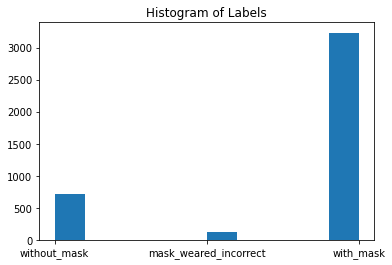

In [45]:
# Histogram of labels
plt.hist(annotations["label"])
plt.title("Histogram of Labels")

In [46]:
images = []

for idx, img in enumerate(os.listdir(images_dir)):
    img = load_img(images_dir + "/" + img)
    images.append(img)

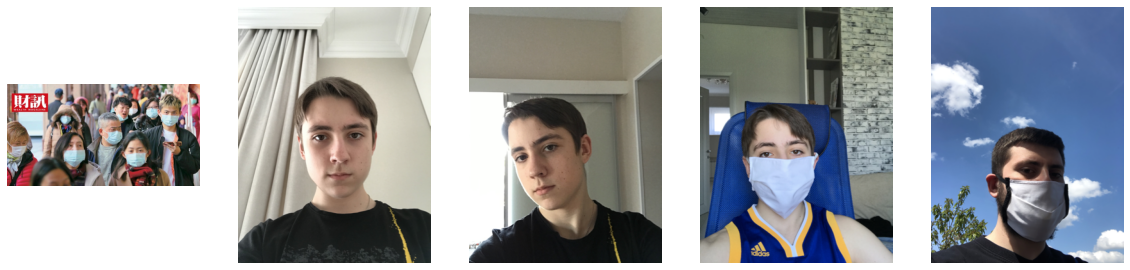

In [47]:
nrows, ncols = 1, 5

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))
for i in range(ncols):
    axs[i].imshow(images[i])
    axs[i].axis('off')

In [49]:
annotations["x"] = annotations["xmax"] - annotations["xmin"]
annotations["y"] = annotations["ymax"] - annotations["ymin"]

Text(0.5, 1.0, 'Scatterplot of cropped images dimensions')

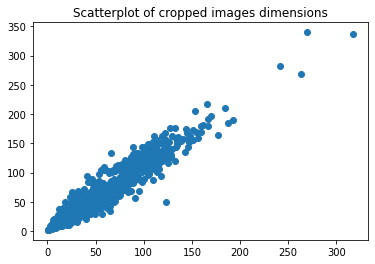

In [51]:
plt.scatter(x=annotations["x"], y=annotations["y"])
plt.title("Scatterplot of cropped images dimensions")